In [ ]:
from PIL import Image, ImageColor

import numpy as np
import colour
from math import sqrt
import pandas as pd

In [ ]:
#https://store.bricklink.com/LeGold?itemID=178857607#/shop?o={%22invID%22:%22178857607%22}

img_path = 'images/climb.jpg'
desired_pix_count = 10000

In [ ]:
#Get lego colours from colours.csv as hex, convert them to RGB then create a master list called COLOURS

df_colours = pd.read_csv('colours.csv')
df_colours['rgb'] = df_colours['hex'].apply(lambda hex_code: ImageColor.getcolor(hex_code, "RGB") )
COLOURS =df_colours['rgb'].to_list()

In [ ]:
def get_height(ratio, width):
    return ratio * width

In [ ]:
def get_total_pix(height, width):
    return height * width

In [ ]:
def get_new_downsized_size(current_size, desired_pix_count):
    """
    Given a desired pix count, downsize image while maintaining aspect ratio

    inputs:
        current_size (tuple):
            Tuple containing H*w
        
        desired_pix_count (int):
            Desired pixel count

    returns:
        new_size (tuple):
            Tuple containing H*w
    """

    ratio = current_size[0]/current_size[1]
    height = 0
    width = 0

    #I can't math so just keep using bigger numbers until you go over the desired pix count. Once you do the previous H*W tried is the new_size
    for current_w in range(1, 10000000): #big number...

        current_h = get_height(ratio = ratio, width = current_w)
        pixels = get_total_pix(current_h,current_w)

        if pixels<=desired_pix_count:
            width = current_w
            height = current_h
        else:        
            break

    return(int(height), width)
    

In [ ]:
def closest_color(rgb):
    r, g, b = rgb
    colour_diffs = []
    for colour in COLOURS:
        cr, cg, cb = colour
        colour_diff = sqrt(abs(r - cr)**2 + abs(g - cg)**2 + abs(b - cb)**2)
        colour_diffs.append((colour_diff, colour))
    return np.array(min(colour_diffs)[1])


In [ ]:
original_img = Image.open(img_path)

new_dims = get_new_downsized_size(original_img.size, desired_pix_count = desired_pix_count)

# Resize smoothly down to new dims
imgSmall = original_img.resize(new_dims,resample=Image.BILINEAR)


In [ ]:
np_img = np.asarray(imgSmall)
img_shape = np_img.shape
np_flat_image = np_img.reshape(img_shape[0] * img_shape[1], img_shape[2])

In [10]:
np_new_img = np.empty(shape=(img_shape[0] * img_shape[1], img_shape[2]), dtype=int)
for i, pix in enumerate(np_flat_image):
    np_new_img[i] = closest_color(pix)

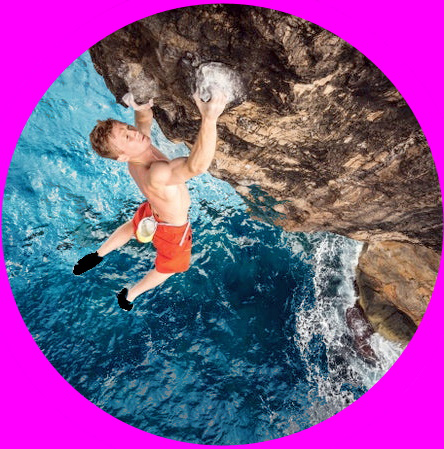

In [11]:
original_img

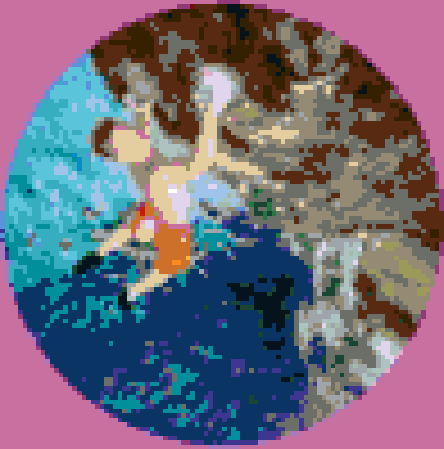

In [13]:
new_img = Image.fromarray(np_new_img.reshape(img_shape).astype(np.uint8))

new_img = new_img.resize(original_img.size,Image.NEAREST)
new_img

In [14]:
print('Pixel size:', new_img.size)
print('')
print('Total pixels:', new_dims[0]* new_dims[1])
print('')
print('Physical size:', np.array(new_dims)*.8/100)
print('')
print('Rough Cost:$', new_dims[0]* new_dims[1]*.04)

Pixel size: (444, 449)

Total pixels: 9800

Physical size: [0.784 0.8  ]

Rough Cost:$ 392.0


In [15]:
df = pd.DataFrame(np_new_img, columns = ['r','g','b'])
df['rgb'] = list(zip(df['r'], df['g'], df['b']))
df = df.merge(df_colours,on='rgb')

In [16]:
df['name'].value_counts()

Dark Pink              2215
Dark Blue              1575
Dark Bluish Gray       1226
Reddish Brown           917
Dark Tan                738
Dark Turquoise          357
Medium Azure            356
Light Bluish Gray       318
Pastel Blue             311
Tan                     281
Dark Brown              264
Dark Purple             220
Black                   144
Light Aqua              141
Bright Light Blue       116
Magenta                 102
Lavender                 90
Medium Dark Flesh        80
Dark Green               74
Medium Lavender          73
Olive Green              59
Medium Blue              55
Sand Green               39
Green                    24
Bright Pink              12
Dark Azure                5
Orange                    2
White                     2
Red                       2
Dark Red                  1
Bright Light Orange       1
Name: name, dtype: int64